### Primo utilizzo di matplotlib hist e hist2d

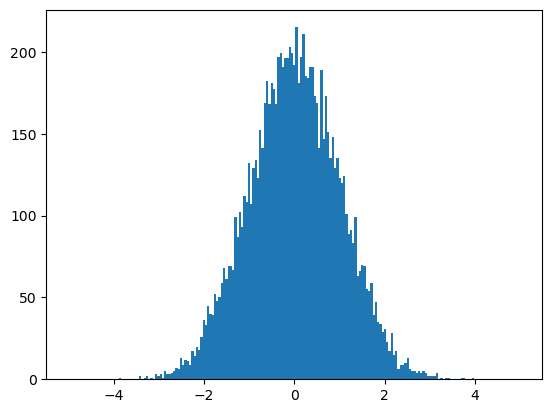

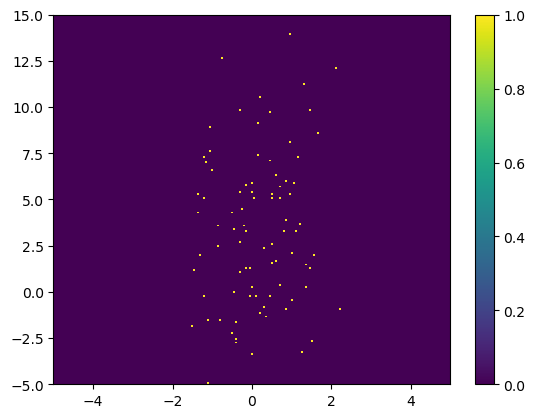

In [1]:
# Test matplotlib hist2

import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(0, 1, 10000)
plt.hist(x, bins=np.linspace(-5, 5, 200))
plt.show()

x = np.random.normal(0, 1, 100)
y = np.random.normal(2, 5, 100)
plt.hist2d(x, y, bins=[np.linspace(-5, 5, 200), np.linspace(-5, 15, 200)])
plt.colorbar()
plt.show()

### Utilizzo di hist2d in un caso piu' semplice (e piu' simile ad un detector)

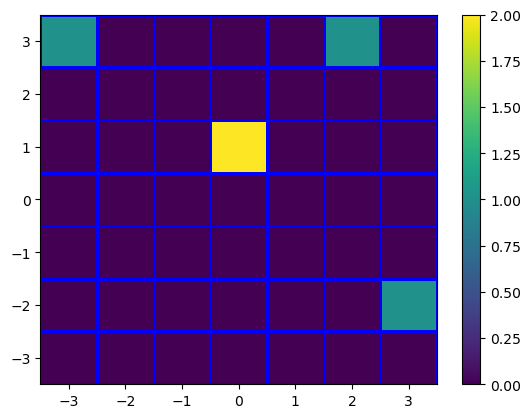

In [2]:
x = np.array([-3, 0, 2, 3, 0])
y = np.array([3, 1, 3, -2, 1])
h, xedges, yedges, _ = plt.hist2d(x, y, bins=[np.linspace(-3.5, 3.5, 8), np.linspace(-3.5, 3.5, 8)], edgecolor='blue')
plt.colorbar()
plt.show()

##### Output di hist2d:

In [3]:
print(h.T[::-1,:])

[[1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [4]:
xedges

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [5]:
yedges

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

### Simulazione detector piccolo

[[ True False False False False  True False]
 [False False False False False False False]
 [False False False  True False False False]
 [False False False False False False False]
 [False False False False False False False]
 [False False False False False False  True]
 [False False False False False False False]] 

[[[-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]
  [-3. -2. -1.  0.  1.  2.  3.]]

 [[ 3.  3.  3.  3.  3.  3.  3.]
  [ 2.  2.  2.  2.  2.  2.  2.]
  [ 1.  1.  1.  1.  1.  1.  1.]
  [ 0.  0.  0.  0.  0.  0.  0.]
  [-1. -1. -1. -1. -1. -1. -1.]
  [-2. -2. -2. -2. -2. -2. -2.]
  [-3. -3. -3. -3. -3. -3. -3.]]] 



,x,y,count
0,-3.0,3.0,1.0
1,2.0,3.0,1.0
2,0.0,1.0,2.0
3,3.0,-2.0,1.0


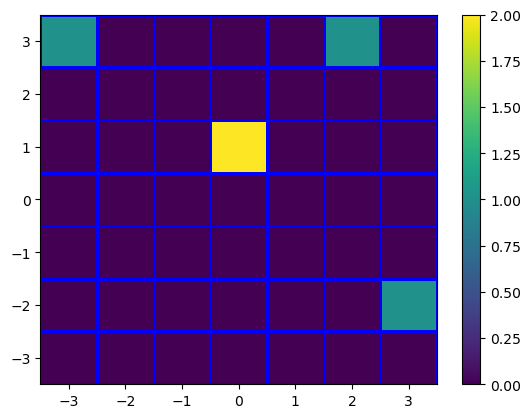

In [25]:
# Automizzazione della ricerca e il salvataggio del passaggio di una particella

import pandas as pd

# coordinate delle particelle
x = np.array([-3, 0, 2, 3, 0])
y = np.array([3, 1, 3, -2, 1])



hit, xed, yed, _ = plt.hist2d(x, y, bins=[np.arange(-3.5, 4.5, 1), np.arange(-3.5, 4.5, 1)], edgecolor='blue')
plt.colorbar()
# plt.close()

center_bins_x = 0.5*(xed[:-1]+xed[1:])
center_bins_y = 0.5*(yed[:-1]+yed[1:])

mask = (hit.T[::-1,:]>0)
print(mask, '\n')

X, Y = np.meshgrid(center_bins_x, center_bins_y[::-1])
Z = np.array([X, Y])
print(Z, '\n')

particles = pd.DataFrame({'x':np.round(Z[0][mask], 2), 'y':np.round(Z[1][mask], 2), 'count':hit.T[::-1,:][mask].T})
particles

### Simulazione detector grande

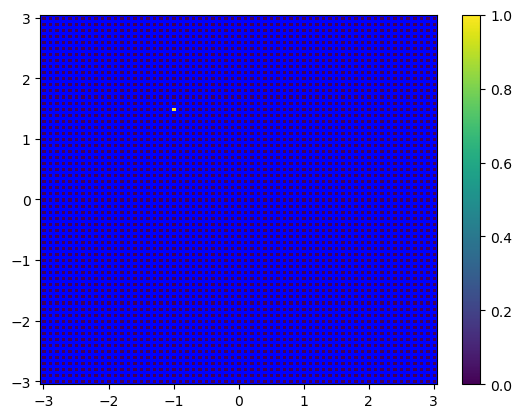

,x,y,count
0,-1.0,1.5,1.0


In [7]:
x = np.array([-1])
y = np.array([1.53])
hit, xed, yed, _ = plt.hist2d(x, y, bins=[np.arange(-3.05, 3.15, 0.1), np.arange(-3.05, 3.15, 0.1)], edgecolor='blue')
plt.colorbar()
plt.show()



center_bins_x = 0.5*(xed[:-1]+xed[1:])
center_bins_y = 0.5*(yed[:-1]+yed[1:])

mask = (hit.T[::-1,:]==1)

X, Y = np.meshgrid(center_bins_x, center_bins_y[::-1])
Z = np.array([X, Y])

particles = pd.DataFrame({'x':np.round(Z[0][mask], 2), 'y':np.round(Z[1][mask], 2), 'count':hit.T[::-1,:][mask].T})
particles

###  Simulazione detector grande con fascio gaussaino

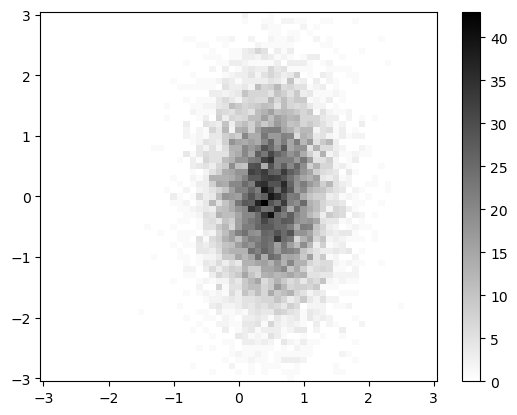

,x,y,count
0,0.1,3.0,2.0
1,0.5,3.0,1.0
2,0.1,2.9,1.0
3,0.4,2.9,1.0
4,0.5,2.9,1.0
...,...,...,...
1256,0.8,-2.9,1.0
1257,0.9,-2.9,1.0
1258,1.5,-2.9,1.0
1259,1.6,-2.9,1.0


In [8]:
import pandas as pd

x = np.random.normal(0.5, 0.5, 10000)
y = np.random.normal(0, 1, 10000)


hit, xed, yed, _ = plt.hist2d(x, y, bins=[np.arange(-3.05, 3.15, 0.1), np.arange(-3.05, 3.15, 0.1)], cmap='binary')
plt.colorbar()
plt.show()

center_bins_x = 0.5*(xed[:-1]+xed[1:])
center_bins_y = 0.5*(yed[:-1]+yed[1:])

mask = (hit.T[::-1,:]>0)

X, Y = np.meshgrid(center_bins_x, center_bins_y[::-1])
Z = np.array([X, Y])

particles = pd.DataFrame({'x':np.round(Z[0][mask], 2), 'y':np.round(Z[1][mask], 2), 'count':hit.T[::-1,:][mask].T})

# print('The particles hit the detector in x position:', Z[0][mask], '\n')
# print('The particles hit the detector in y position:', Z[1][mask], '\n')
particles

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] 

[[[-0.010025 -0.009975 -0.009925 ...  0.009875  0.009925  0.009975]
  [-0.010025 -0.009975 -0.009925 ...  0.009875  0.009925  0.009975]
  [-0.010025 -0.009975 -0.009925 ...  0.009875  0.009925  0.009975]
  ...
  [-0.010025 -0.009975 -0.009925 ...  0.009875  0.009925  0.009975]
  [-0.010025 -0.009975 -0.009925 ...  0.009875  0.009925  0.009975]
  [-0.010025 -0.009975 -0.009925 ...  0.009875  0.009925  0.009975]]

 [[ 0.009975  0.009975  0.009975 ...  0.009975  0.009975  0.009975]
  [ 0.009925  0.009925  0.009925 ...  0.009925  0.009925  0.009925]
  [ 0.009875  0.009875  0.009875 ...  0.009875  0.009875  0.009875]
  ...
  [-0.009925 -0.009925 -0.009925 ... -0.009925 -0.009925 -0.009925]
  [-0.009975 -0.009975 -0.009975 ... -0.

,x,y,count
0,-0.003975,0.006425,1.0


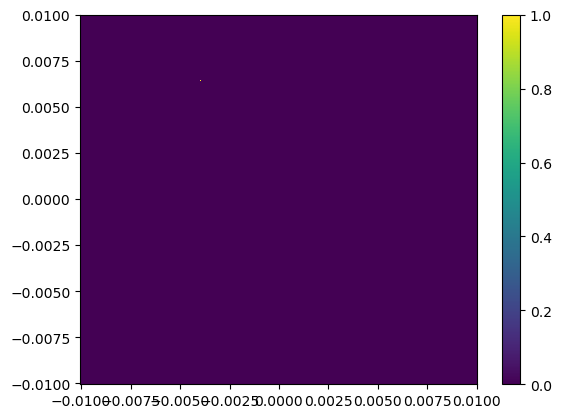

In [24]:
# Automizzazione della ricerca e il salvataggio del passaggio di una particella

import pandas as pd

# coordinate delle particelle
x = np.random.uniform(-0.0105, 0.0105, 1)
y = np.random.uniform(-0.0105, 0.0105, 1)



hit, xed, yed, _ = plt.hist2d(x, y, bins=[np.arange(-0.01005, 0.01005, 0.00005), np.arange(-0.01005, 0.01005, 0.00005)])
plt.colorbar()
# plt.close()

center_bins_x = 0.5*(xed[:-1]+xed[1:])
center_bins_y = 0.5*(yed[:-1]+yed[1:])

mask = (hit.T[::-1,:]>0)
print(mask, '\n')

X, Y = np.meshgrid(center_bins_x, center_bins_y[::-1])
Z = np.array([X, Y])
print(Z, '\n')

particles = pd.DataFrame({'x':np.round(Z[0][mask], 7), 'y':np.round(Z[1][mask], 7), 'count':hit.T[::-1,:][mask].T})
particles